In [17]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import log
from scipy import stats
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline 
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = 400
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [5]:
%%capture
! pip install ipywidgets

In [20]:
df = pd.read_csv(r"C:\Users\user\Documents\hsng.csv")
df.head(2)

,OverallQual,GarageCars,FullBath,TotRmsAbvGrd,MSZoning,Neighborhood,Condition1,Condition2,HouseStyle,ExterQual,BsmtQual,BsmtCond,KitchenQual,GarageType,GarageFinish,PoolQC,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,LotArea,BsmtUnfSF,SalePrice
0,7,2,2,8,6,6,3,3,4,4,4,3,4,2,2,0,1710,548,856,856,2003,706,0,854,61,8450,150,208500
1,6,2,2,6,6,25,2,3,1,3,4,3,3,2,2,0,1262,460,1262,1262,1976,978,298,0,0,9600,284,181500


In [39]:
model1_df=df[['OverallQual','BsmtQual','FullBath','TotRmsAbvGrd']]
model2_df=df[['OverallQual','GarageCars','FullBath','TotRmsAbvGrd','MSZoning','Neighborhood','Condition1','Condition2',
              'HouseStyle','ExterQual','BsmtQual','BsmtCond','KitchenQual','GarageType','GarageFinish','PoolQC',
              'GrLivArea','GarageArea','TotalBsmtSF']]
model3_df=df[['2ndFlrSF','OpenPorchSF','LotArea','BsmtUnfSF']]

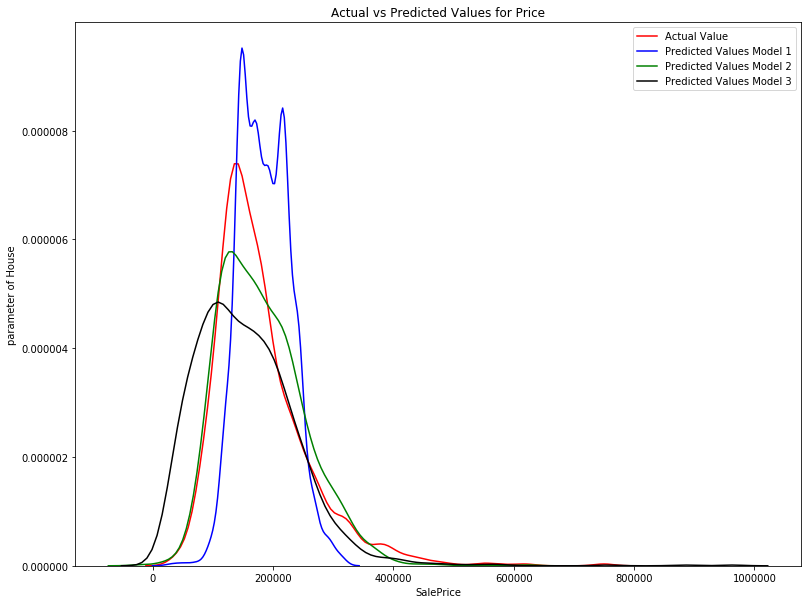

In [43]:
model1_fit = sm.OLS(df['SalePrice'],model1_df,missing='drop').fit()
model1_prediction=model1_fit.predict(model1_df) 

model2_fit = sm.OLS(df['SalePrice'],model2_df,missing='drop').fit()
model2_prediction=model2_fit.predict(model2_df) 

model3_fit = sm.OLS(df['SalePrice'],model3_df,missing='drop').fit()
model3_prediction=model3_fit.predict(model3_df) 

plt.figure(figsize=(13, 10))

ax1 = sns.distplot(df['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(model1_prediction, hist=False, color="b", label="Predicted Values Model 1" , ax=ax1)
sns.distplot(model2_prediction, hist=False, color="g", label="Predicted Values Model 2" , ax=ax1)
sns.distplot(model3_prediction, hist=False, color="k", label="Predicted Values Model 3" , ax=ax1)

plt.title('Actual vs Predicted Values for Price')
plt.xlabel('SalePrice')
plt.ylabel('parameter of House')
plt.show()
plt.close()

In [95]:
def calculate_aic(n, mse, num_params):
    aic = (-2 * log(mse)) + 2 * num_params
    return aic

In [ ]:
def calculate_bic(n, mse, num_params):
    bic = n * log(mse) + num_params * log(n)
    return bic

In [67]:
print("BIC_Model_1", calculate_bic(len(df['SalePrice']),
                                   mean_squared_error(df['SalePrice'],model1_prediction),
                                   len(model1_fit.params)+1))

In [101]:
print("Model_1_AIC: ",model1_fit.aic)
print("Model_2_AIC: ",model2_fit.aic)
print("Model_3_AIC: ",model3_fit.aic)

Model_1_AIC:  35867.86938187073
Model_2_AIC:  34848.104617973455
Model_3_AIC:  37377.73985235205


In [102]:
print("Model_1_BIC: ",model1_fit.aic)
print("Model_2_BIC: ",model2_fit.bic)
print("Model_3_BIC: ",model3_fit.bic)

Model_1_BIC:  35867.86938187073
Model_2_BIC:  34948.5422605528
Model_3_BIC:  37398.88461921086


In [108]:
print("R_Sqaured_Model_1: ",model1_fit.rsquared)
print("R_Sqaured_Model_2: ",model2_fit.rsquared)
print("R_Sqaured_Model_3: ",model3_fit.rsquared)

R_Sqaured_Model_1:  0.9303419171596625
R_Sqaured_Model_2:  0.9660604235173862
R_Sqaured_Model_3:  0.8040701671676717


In [107]:
print("Adj_R_Sqaured_Model_1_BIC: ",model1_fit.rsquared_adj)
print("Adj_R_Sqaured_Model_2_BIC: ",model2_fit.rsquared_adj)
print("Adj_R_Sqaured_Model_3_BIC: ",model3_fit.rsquared_adj)

Adj_R_Sqaured_Model_1_BIC:  0.9301505488002111
Adj_R_Sqaured_Model_2_BIC:  0.9656129204270534
Adj_R_Sqaured_Model_3_BIC:  0.8035318983961542


In [106]:
print("MSE_Model_1: ",mean_squared_error(df['SalePrice'],model1_prediction))
print("MSE_Model_2: ",mean_squared_error(df['SalePrice'],model2_prediction))
print("MSE_Model_3: ",mean_squared_error(df['SalePrice'],model3_prediction))

MSE_Model_1:  2719400544.0136585
MSE_Model_2:  1324976212.1929514
MSE_Model_3:  7648957195.879058
